In [1]:
# Write your imports here

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import nltk
import os

# Working with Text Lab
## Information retrieval, preprocessing, and feature extraction

In this lab, you'll be looking at and exploring European restaurant reviews. The dataset is rather tiny, but that's just because it has to run on any machine. In real life, just like with images, texts can be several terabytes long.

The dataset is located [here](https://www.kaggle.com/datasets/gorororororo23/european-restaurant-reviews) and as always, it's been provided to you in the `data/` folder.

### Problem 1. Read the dataset (1 point)
Read the dataset, get acquainted with it. Ensure the data is valid before you proceed.

How many observations are there? Which country is the most represented? What time range does the dataset represent?

Is the sample balanced in terms of restaurants, i.e., do you have an equal number of reviews for each one? Most importantly, is the dataset balanced in terms of **sentiment**?

In [5]:
reviews = pd.read_csv('data\European Restaurant Reviews.csv')

reviews.shape

reviews.columns

Index(['Country', 'Restaurant Name', 'Sentiment', 'Review Title',
       'Review Date', 'Review'],
      dtype='object')

In [6]:
reviews['Country'].max()

'Russia'

Now we are going to clean up the date column in order to prepare it for datetime conversion and then we are going to extract the range.

In [7]:
reviews['Review Date'] = reviews['Review Date'].str.extract(r'([A-Za-z]+\s+\d{4})', expand=False)


In [8]:
reviews['Review Date'] = reviews['Review Date'].str.replace('Sept', 'Sep')

In [9]:
reviews['Review Date'] = pd.to_datetime(reviews['Review Date'], format='%b %Y')


In [10]:
reviews['Review Date'] = reviews['Review Date'].dt.to_period('M')

In [11]:
min_date = reviews['Review Date'].min()
max_date = reviews['Review Date'].max()

print(f"Date range: {min_date} to {max_date}")


Date range: 2010-09 to 2024-07


Next, focusing on sentiments. 

In [12]:
restaurant_counts = reviews['Restaurant Name'].value_counts()

print(restaurant_counts)


Restaurant Name
The Frog at Bercy Village                512
Ad Hoc Ristorante (Piazza del Popolo)    318
The LOFT                                 210
Old Square (Plaza Vieja)                 146
Stara Kamienica                          135
Pelmenya                                 100
Mosaic                                    81
Name: count, dtype: int64


In [13]:
sentiment_counts = reviews['Sentiment'].value_counts()
print("\nReviews per sentiment:\n", sentiment_counts)


Reviews per sentiment:
 Sentiment
Positive    1237
Negative     265
Name: count, dtype: int64


The dataset is unbalanced in terms of both restaurant reviews and sentiment.

### Problem 2. Getting acquainted with reviews (1 point)
Are positive comments typically shorter or longer? Try to define a good, robust metric for "length" of a text; it's not necessary just the character count. Can you explain your findings?

We are going to use word count, sentence count and average word length. Word count will show us tendencies in review length for positive and for negative reviews. Sentence count will represent similar insight, while word length will show us the complexity of the words used.

In [14]:
reviews['Word Count'] = reviews['Review'].apply(lambda x: len(str(x).split()))
print(reviews[['Review', 'Word Count']].head())


                                              Review  Word Count
0  The manager became agressive when I said the c...          28
1  I ordered a beef fillet ask to be done medium,...          58
2  This is an attractive venue with welcoming, al...          40
3  Sadly I  used the high TripAdvisor rating too ...         279
4  From the start this meal was bad- especially g...         243


In [15]:
avg_word_count_per_sentiment = reviews.groupby('Sentiment')['Word Count'].mean()
print(avg_word_count_per_sentiment)


Sentiment
Negative    140.573585
Positive     50.183508
Name: Word Count, dtype: float64


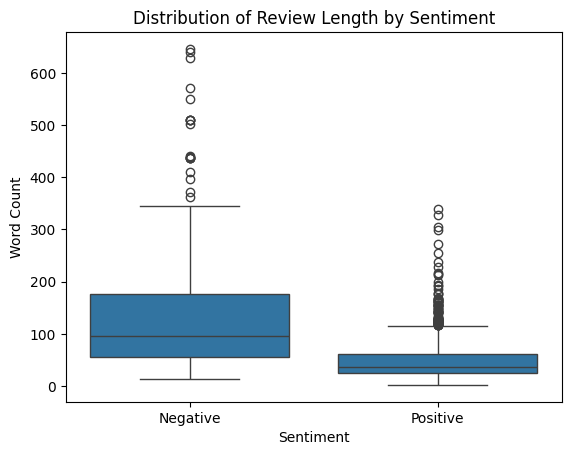

In [16]:
sns.boxplot(x='Sentiment', y='Word Count', data=reviews)
plt.title('Distribution of Review Length by Sentiment')
plt.show()

The average word length being greater for positive reviews tells us that users perhaps tend to elaborate when giving a bad review, while they don't need to delve into specifics when giving good feedback.

In [34]:
reviews['Sentence Count'] = reviews['Review'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [39]:
reviews['Average Word Length'] = reviews['Review'].apply(lambda x: np.mean([len(word) for word in re.findall(r'\w+', x)]))

In [44]:
avg_sentence_count_per_sentiment = reviews.groupby('Sentiment')['Sentence Count'].mean()
print(avg_sentence_count_per_sentiment)

Sentiment
Negative    8.867925
Positive    4.150364
Name: Sentence Count, dtype: float64


In [46]:
avg_word_length_per_sentiment = reviews.groupby('Sentiment')['Average Word Length'].mean()
print(avg_word_length_per_sentiment)

Sentiment
Negative    4.249589
Positive    4.549510
Name: Average Word Length, dtype: float64


### Problem 3. Preprocess the review content (2 points)
You'll likely need to do this while working on the problems below, but try to synthesize (and document!) your preprocessing here. Your tasks will revolve around words and their connection to sentiment. While preprocessing, keep in mind the domain (restaurant reviews) and the task (sentiment analysis).

### Problem 3. Top words (1 point)
Use a simple word tokenization and count the top 10 words in positive reviews; then the top 10 words in negative reviews*. Once again, try to define what "top" words means. Describe and document your process. Explain your results.

\* Okay, you may want to see top N words (with $N \ge 10$).

### Problem 4. Review titles (2 point)
How do the top words you found in the last problem correlate to the review titles? Do the top 10 words (for each sentiment) appear in the titles at all? Do reviews which contain one or more of the top words have the same words in their titles?

Does the title of a comment present a good summary of its content? That is, are the titles descriptive, or are they simply meant to catch the attention of the reader?

### Problem 5. Bag of words (1 point)
Based on your findings so far, come up with a good set of settings (hyperparameters) for a bag-of-words model for review titles and contents. It's easiest to treat them separately (so, create two models); but you may also think about a unified representation. I find the simplest way of concatenating the title and content too simplistic to be useful, as it doesn't allow you to treat the title differently (e.g., by giving it more weight).

The documentation for `CountVectorizer` is [here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Familiarize yourself with all settings; try out different combinations and come up with a final model; or rather - two models :).

### Problem 6. Deep sentiment analysis models (1 point)
Find a suitable model for sentiment analysis in English. Without modifying, training, or fine-tuning the model, make it predict all contents (or better, combinations of titles and contents, if you can). Meaure the accuracy of the model compared to the `sentiment` column in the dataset.

### Problem 7. Deep features (embeddings) (1 point)
Use the same model to perform feature extraction on the review contents (or contents + titles) instead of direct predictions. You should already be familiar how to do that from your work on images.

Use the cosine similarity between texts to try to cluster them. Are there "similar" reviews (you'll need to find a way to measure similarity) across different restaurants? Are customers generally in agreement for the same restaurant?

### \* Problem 8. Explore and model at will
In this lab, we focused on preprocessing and feature extraction and we didn't really have a chance to train (or compare) models. The dataset is maybe too small to be conclusive, but feel free to play around with ready-made models, and train your own.